In [1]:
pip install pandas

In [2]:
 pip install beautifulsoup4

In [3]:
pip install requests

In [4]:
pip install nltk

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Importing Modules

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Data Scraping

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA cancelled the flight fro...
1,✅ Trip Verified | I strongly advise everyone t...
2,✅ Trip Verified | My partner and I were on the...
3,Not Verified | We had a Premium Economy retur...
4,✅ Trip Verified | I should like to review my ...


In [9]:
# Save the DataFrame to a CSV file
csv_file_path = '/content/scraped_data.csv'
df.to_csv(csv_file_path, index=False)


#Data Cleaning


In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
df = pd.read_csv('/content/scraped_data.csv')

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# List of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Replace numbers with nothing
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r' ', ' ', text).strip()
    return text

# Apply cleaning function to the reviews column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)

stop_words_list = list(stop_words)

# Now, tokenize and remove stopwords correctly
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stop_words_list)
X = vectorizer.fit_transform(df['cleaned_reviews']).toarray()

# Correctly getting feature names
feature_names = vectorizer.get_feature_names_out()

# Proceed with stemming
stemmed_X = []
for i in range(len(X)):
    row = []
    for j in range(len(X[i])):
        if X[i][j] > 0:
            row.append(stemmer.stem(feature_names[j]))  # Use feature_names here
    stemmed_X.append(row)


# Analysis

In [13]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Analyze sentiment for each review
df['sentiment'] = df['cleaned_reviews'].apply(analyze_sentiment)


# Visualisation

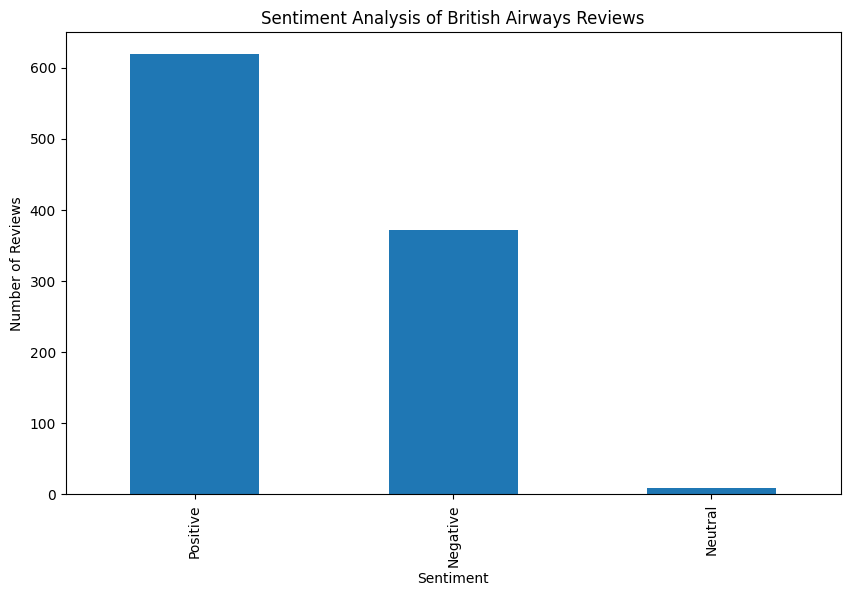

In [14]:
import matplotlib.pyplot as plt

# Plotting the sentiment analysis
plt.figure(figsize=(10,6))
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis of British Airways Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
